In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
os.chdir('..')
os.chdir('..')

In [2]:
# Data Loading

df = pd.read_csv("data/heart_statlog_cleveland_hungary_final.csv")
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [3]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


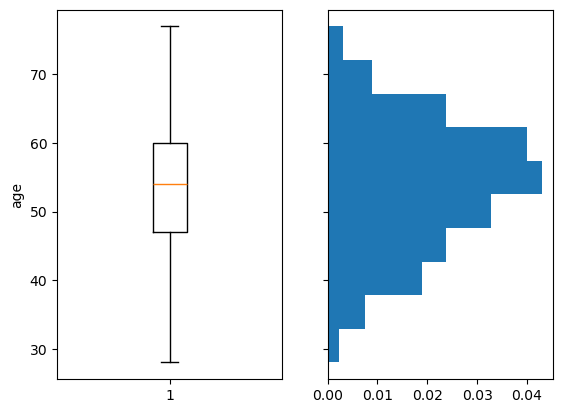

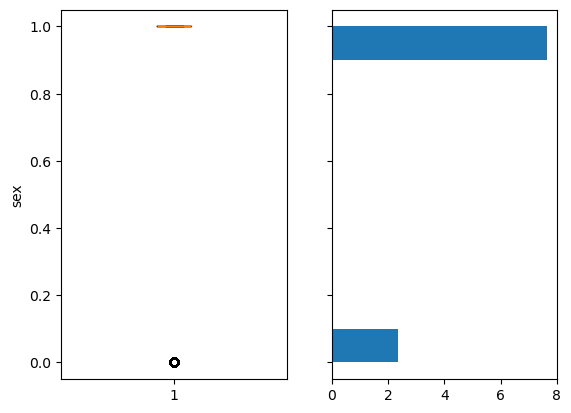

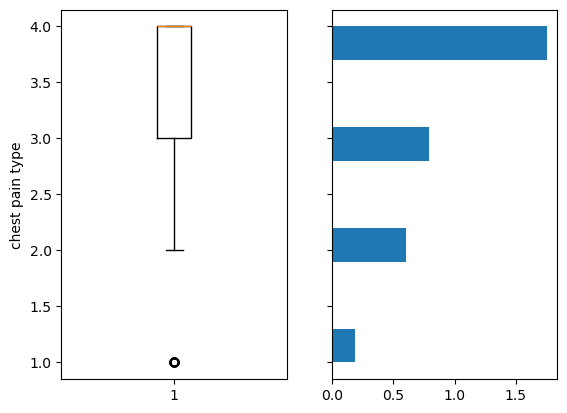

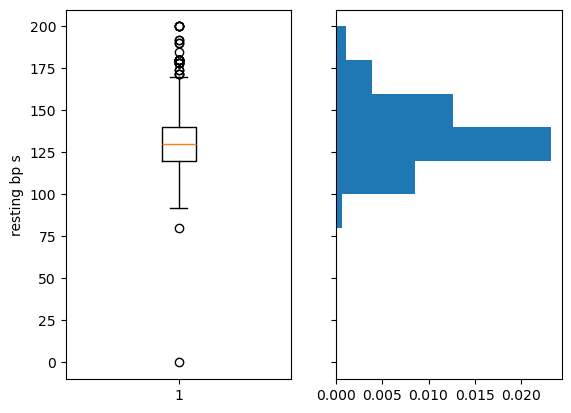

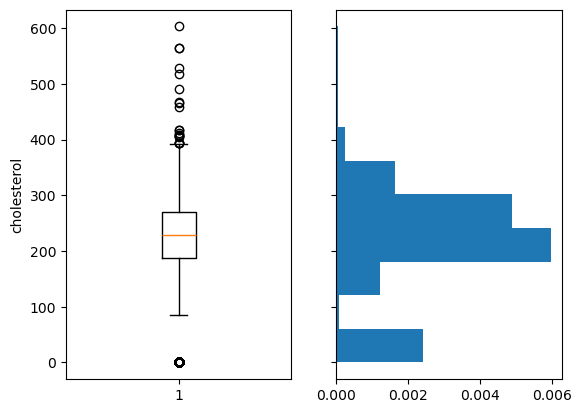

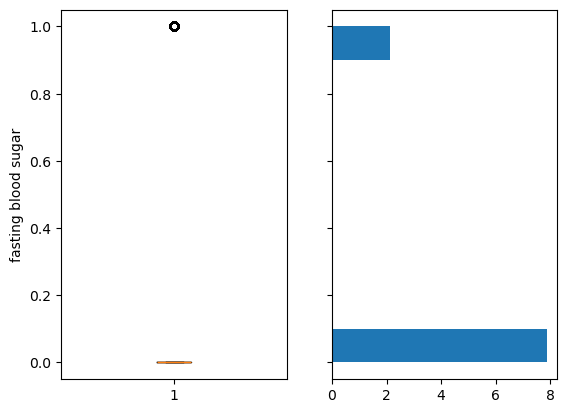

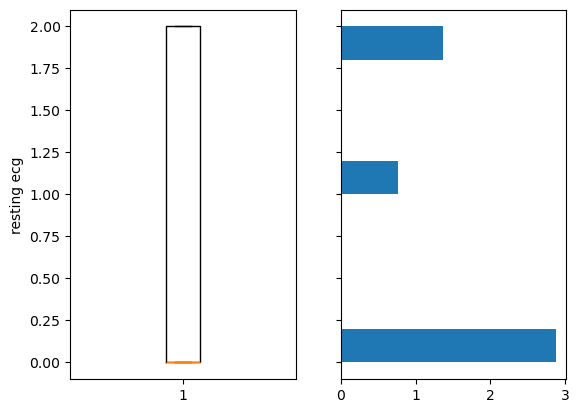

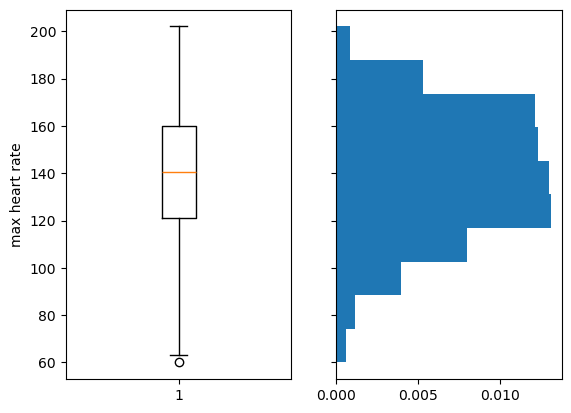

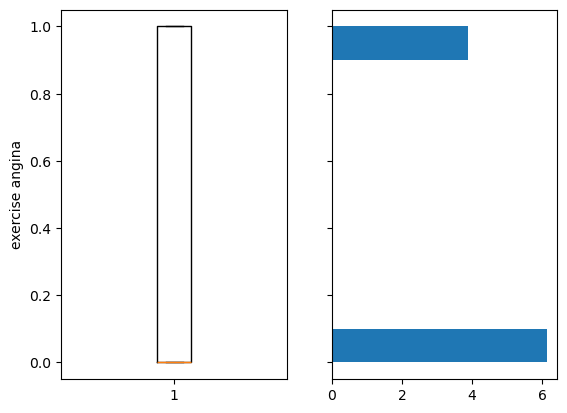

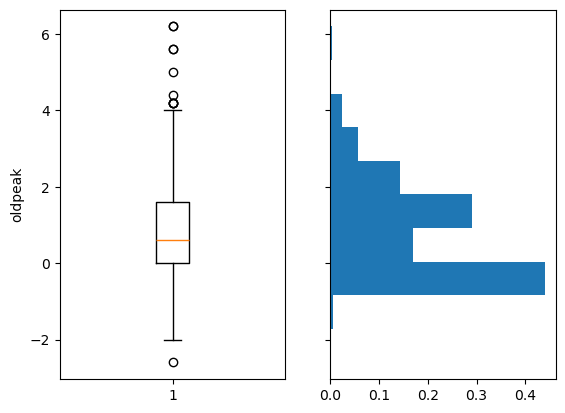

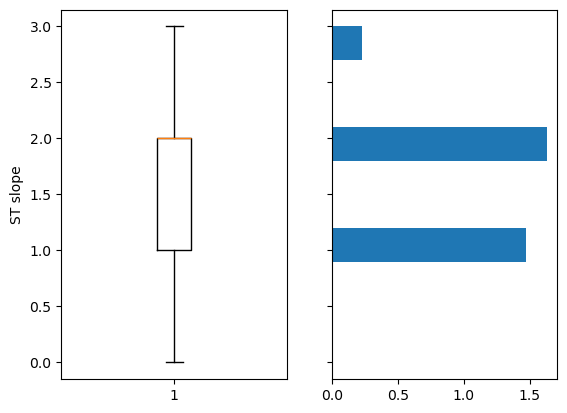

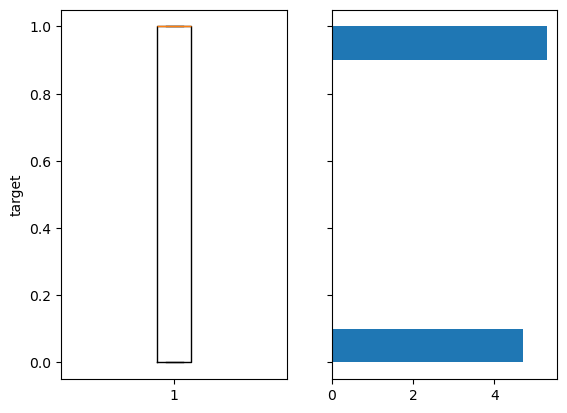

In [5]:
# Exploratory Data Analysis
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for i in range(df.shape[1]):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.boxplot(df[df.columns[i]])
    ax1.set_ylabel(df.columns[i])
    ax2.hist(df[df.columns[i]], density=True, orientation='horizontal')

In [6]:
n = df.shape[0]

# Check and remove duplicate rows
df.drop_duplicates(inplace=True)
print('Number of rows droped: ' + str(n - df.shape[0]))

# Check for missing values
for i in range(df.shape[1]):
    if df[df.columns[i]].isna().sum() > 0:
        print(df.columns[i] + 'has' + str(df[df.columns[i]].isna().sum()) + 'missing values')
    else:
        print('No missing value')

# Handling outliers
df['cholesterol'] = [np.nan if x==0 else x for x in df['cholesterol']]
df['resting bp s'] = [np.nan if x==0 else x for x in df['resting bp s']]

Number of rows droped: 272
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value


In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df.iloc[:, :] = imputer.fit_transform(df)

/home/gaidink/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/gaidink/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/gaidink/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/gaidink/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

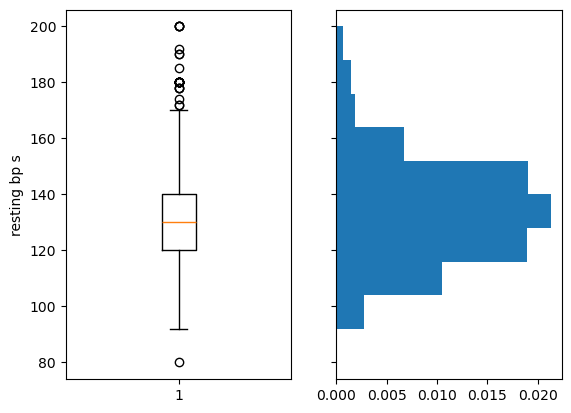

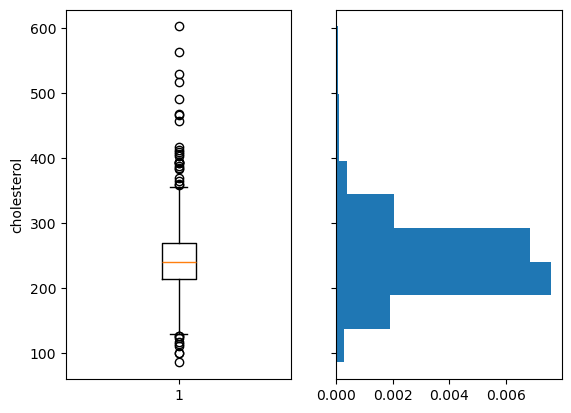

In [8]:
for i in range(3, 5):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.boxplot(df[df.columns[i]])
    ax1.set_ylabel(df.columns[i])
    ax2.hist(df[df.columns[i]], density=True, orientation='horizontal')

In [9]:
# Check for missing values
for i in range(df.shape[1]):
    if df[df.columns[i]].isna().sum() > 0:
        print(df.columns[i] + ' has ' + str(df[df.columns[i]].isna().sum()) + ' missing values')
    else:
        print('No missing value')

No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value
No missing value


In [10]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.533442,244.341939,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,17.991348,53.888447,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,213.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,240.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.900000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [14]:
# Classical PCA

class PCA:
    def __init__(self, data):
        """
        Parameter: 2D-array, type: Panda Dataframe
        Return: None, but assigns data, X, and y values.
        """
        self.data = data
        self.X, self.y = data.iloc[:, :data.shape[1]-1], data.iloc[data.shape[1]-1]
        self.pc_svd = None
        self.pc_ed = None
        self.matrix_proj_svd = None
        self.matrix_proj_ed = None

        
    def svd(self):
        """
        Parameter: 2D-array, type: Panda Dataframe
        Return: 2D-array of transformed dataset with principal components, type: Panda Dataframe
        """
        print('testing')
        X_centered = self.X - self.X.mean()
        U, S, Vt = np.linalg.svd(X_centered)
        X_d = self.X.dot(Vt.T[:, :])
        self.pc_svd = X_d
        self.matrix_proj_svd = Vt.T[:, :]
        return X_d
        
    def ed(self):
        """
        Parameter: 2D-array, type: Panda Dataframe
        Return: 2D-array of transformed dataset with principal components, type: Panda Dataframe
        """
        C = (1/self.X.shape[0]) * self.X.transpose().dot(self.X)
        ei_values, ei_vectors = np.linalg.eig(C)
        X_d = self.X.dot(ei_vectors)
        self.pc_ed = X_d
        self.matrix_proj_ed = ei_vectors
        return X_d

    def explained_variance(self, X_d):
        """
        Parameter: 2D-array, type: Panda dataframe
        Return: Variance of each columns, type: Numpy nd-array.
        """
        X = X_d.copy()
        EV = []
        for c in range(X.shape[1]):
            EV.append(X.iloc[:, c].std() ** 2)
        EV = np.asarray(EV)
        return EV
        
    def explained_variance_ratio(self, X_d):
        """
        Parameter: 2D-array, type: Panda dataframe
        Return: Variance ratio of each columns, type: Numpy nd-array.
        """
        EVR = []
        X = X_d.copy()
        EV = explained_variance(X)
        s = sum(EV)
        for v in EV:
            EVR.append(v/s)
        EVR = np.asarray(EVR)
        return EVR